In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import math

In [2]:
####################################################
def find_common_elements(list1,list2):
    common_elements = []
    for each_element in list2:
        if each_element in list1:
            common_elements.append(each_element)
    return common_elements
####################################################
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
####################################################
def calculateDistance(x1,y1,x2,y2):  
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist
####################################################
def farthest_points(points):
    max_distance = 0
    for i in range(len(points)):
        for j in range(i+1,len(points)):
            distance = calculateDistance(points[i][0],points[i][1],points[j][0],points[j][1])
            if (distance>max_distance):
                first_point_index = i
                second_point_index = j
                max_distance = distance
    return [points[first_point_index],points[second_point_index]]
####################################################
def show_image(*image):
    plt.figure(figsize=(16,15))
    plt.imshow(image[0],cmap="gray")
    if len(image)>1 : plt.title(image[1])
    #plt.axis("off")
    plt.show()
#########################################################
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
#########################################################
def select_largest_obj(img_bin, lab_val=255, fill_holes=False, 
                           smooth_boundary=False, kernel_size=15):
    #show_image(img_bin,"Original")
    n_labels, img_labeled, lab_stats, _ = \
            cv2.connectedComponentsWithStats(img_bin, connectivity=8, 
                                             ltype=cv2.CV_32S)
    largest_obj_lab = np.argmax(lab_stats[1:, 4]) + 1
    largest_mask = np.zeros(img_bin.shape, dtype=np.uint8)
    largest_mask[img_labeled == largest_obj_lab] = lab_val
    # import pdb; pdb.set_trace()
    if fill_holes:
        bkg_locs = np.where(img_labeled == 0)
        bkg_seed = (bkg_locs[0][0], bkg_locs[1][0])
        img_floodfill = largest_mask.copy()
        h_, w_ = largest_mask.shape
        mask_ = np.zeros((h_ + 2, w_ + 2), dtype=np.uint8)
        cv2.floodFill(img_floodfill, mask_, seedPoint=bkg_seed, 
                      newVal=lab_val)
        holes_mask = cv2.bitwise_not(img_floodfill)  # mask of the holes.
        largest_mask = largest_mask + holes_mask
    if smooth_boundary:
        kernel_ = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        largest_mask = cv2.morphologyEx(largest_mask, cv2.MORPH_OPEN, 
                                        kernel_)
    return largest_mask 
####################################################
def single_pixel(image):
    skel, distance = medial_axis(image, return_distance=True)
    dist_on_skel = distance * skel
    dist_on_skel = dist_on_skel.astype('uint8')
    for i in range (0,dist_on_skel.shape[0]):
        for j in range(0,dist_on_skel.shape[1]):
            if dist_on_skel[i][j]>0:
                dist_on_skel[i][j] = 1
    return dist_on_skel
####################################################
def find_end_points(largest_component):
    end_points=[]
    padded_object = (np.pad(largest_component, 1, pad_with, padder=0))
    padded_object = padded_object/255
    padded_object.astype(int)
    for j in range(padded_object.shape[0]-2):
        for i in range(padded_object.shape[1]-2):
            subset = padded_object[j:j+3,i:i+3]
            if (subset[1][1])==1:
                if (subset.sum()==2):
                    end_points.append([i,j])
                elif (subset.sum()>2):
                    if (subset[0].sum()!=3 and subset[1].sum()!=3 and subset[2].sum()!=3):
                        if (subset[:,0].sum()!=3 and subset[:,1].sum()!=3 and subset[:,2].sum()!=3):
                            if (subset[0].sum()!=1 and subset[2].sum()!=1):
                                if (subset[:,0].sum()!=1 and subset[:,2].sum()!=1): 
                                #and (subset[0].sum()==0 or subset[1].sum()==0 or subset[2].sum()==0 or subset[:,0].sum()==0)):
                                    end_points.append([i,j])
                                    #print(subset)
    return end_points
####################################################
def remove_duplicates(list1):
    unique_list=[]
    for each in list1:
        if each not in unique_list:
            unique_list.append(each)
    return unique_list
####################################################
def farthest_points_to(first_point,extremes):
    max_distance = 0
    for each in extremes:
        distance = calculateDistance(first_point[0],first_point[1],each[0],each[1])
        if (distance>max_distance):
            farthest_point = each
            max_distance = distance
    return farthest_point
####################################################


In [3]:
xmls = []
images = []
for file in os.listdir("/Users/ankitkpr93/UTS_projects/codebot/Test_files"):
    if file.endswith(".xml"):
        xmls.append(file)
    else:
        images.append(file)
print(xmls)
print(images)

['IMG_0402_0.xml', 'IMG_0400_0.xml', 'IMG_0384_0.xml']
['IMG_0400_0.jpeg', 'IMG_0402_0.jpeg', 'IMG_0384_0.jpeg']



						 Relationships

						 1 <=======> 3
						one_to_many
						 5 <=======> 8
						one_to_many
						 2 <=======> 4
						one_to_many
						 4 <=======> 5
						one_to_many
						 9 <=======> 10
						one_to_many
						 8 <=======> 9
						 3 <=======> 8
						 8 <=======> 6
						 10 <=======> 10
						 0 <=======> 9
						 9 <=======> 7
						 2 <=======> 3
						 6 <=======> 6



						 Relationships

						 2 <=======> 3
						one_to_many
						 3 <=======> 4
						one_to_many
						 0 <=======> 2
						 3 <=======> 3
						 0 <=======> 3
						 0 <=======> 1


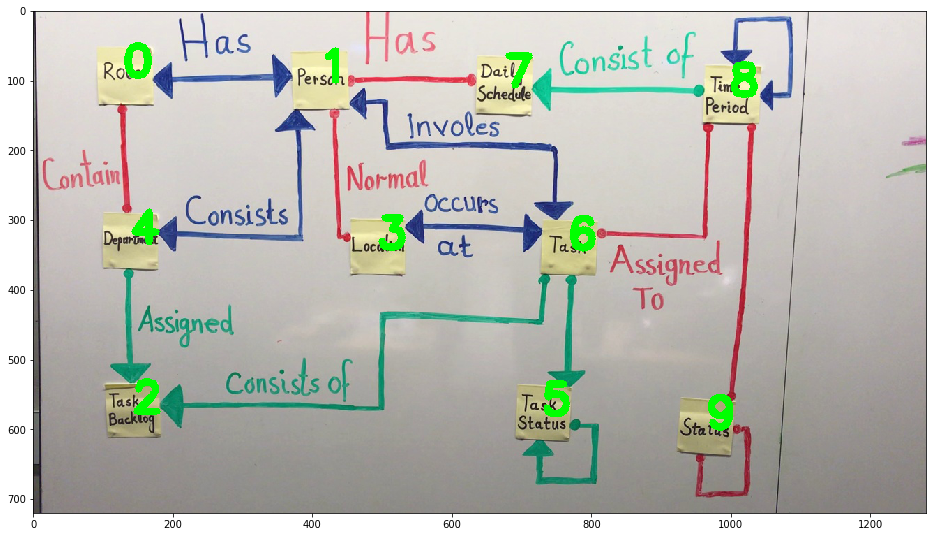


						 Relationships

						 2 <=======> 4
						one_to_many
						 2 <=======> 6
						one_to_many
						 5 <=======> 6
						one_to_many
						 5 <=======> 5
						 7 <=======> 8
						one_to_many
						 0 <=======> 1
						 4 <=======> 1
						 1 <=======> 6
						 3 <=======> 6
						 8 <=======> 8
						 0 <=======> 4
						 1 <=======> 1
						 3 <=======> 1
						 6 <=======> 8
						 9 <=======> 8
						 9 <=======> 9


In [4]:
for i in range(len(xmls)):
    arrow_locations_dict = {'one_to_many':[],'many_to_many':[],'one_to_one':[]}
    entity_location_list = []
    import xml.etree.ElementTree as ET
    import cv2
    tree = ET.parse('/Users/ankitkpr93/UTS_projects/codebot/Test_files/%s'%xmls[i])
    root = tree.getroot()
    for child in root[6:]:
        if (child[0].text)=='one_to_many':
            for f_child in child[4:]:
                location = []
                for s_child in f_child:
                    location.append(int(s_child.text))
                arrow_locations_dict['one_to_many'].append(location)
        if (child[0].text)=='many_to_many':
            for f_child in child[4:]:
                location = []
                for s_child in f_child:
                    location.append(int(s_child.text))
                arrow_locations_dict['many_to_many'].append(location)
        if (child[0].text)=='one_to_one':
            for f_child in child[4:]:
                location = []
                for s_child in f_child:
                    location.append(int(s_child.text))
                arrow_locations_dict['one_to_one'].append(location)
        if (child[0].text)=='entity':
            for f_child in child[4:]:
                location = []
                for s_child in f_child:
                    location.append(int(s_child.text))
                entity_location_list.append([location[1]+int((location[3]-location[1])/2),location[0]+int((location[2]-location[0])/2)])
    #print("Arrow Location List - ",arrow_locations_dict)
    #print("Entities Centroid - ",entity_location_list)
    image_name = xmls[i][:-4]+".jpeg"
    raw_image = Image.open("/Users/ankitkpr93/UTS_projects/codebot/Test_files/%s"%image_name)
    (H,W)=raw_image.size[:2]
    raw_image_np = load_image_into_numpy_array(raw_image)
    count =0
    raw_image_np_copy = raw_image_np.copy()
    for each in entity_location_list:
        cv2.putText(raw_image_np_copy,str(count), (each[1],each[0]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),10)
        count+=1
    show_image(raw_image_np_copy)
    print("\n\t\t\t\t\t\t Relationships\n")
    for each_arrow_type in arrow_locations_dict.keys():
        for each_arrow in arrow_locations_dict[each_arrow_type]:
            #print(each_arrow)
            #show_image(image_np,"Original Image")
            subset = raw_image_np[each_arrow[1]:each_arrow[3],each_arrow[0]:each_arrow[2]]
            #show_image(subset)
            W_s,H_s = subset.shape[:2] #width and height of subset
            #show_image(subset,"Arrow")
            gray_subset = cv2.cvtColor(subset,cv2.COLOR_RGB2GRAY)
            ret, binary_img = cv2.threshold(gray_subset, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            #cv2.rectangle(image_np, (499, 566), (1271, 987), (255, 0, 255), 3,5)
            #show_image(binary_img,"Binary Image")
            #cv2.imwrite("original_binary.jpg",binary_img)
            thinned_image = single_pixel(binary_img)
            #show_image(thinned_image,"Thinned Image")
            largest_component = select_largest_obj(thinned_image)
            #show_image(largest_component,"Largest Component")
            #thinned_image = single_pixel(largest_component)
            #show_image(thinned_image,"Thinned Image")
            #location = find_end_points(largest_component)
            #print(location)
            #cv2.circle(image_np,(location[2],location[3]),4,(255,255,0),-1)
            #cv2.circle(image_np,(location[0],location[1]),4,(0,255,255),-1)
            #show_image(image_np)
            cnts = cv2.findContours(largest_component, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            extLeft = list(c[c[:, :, 0].argmin()][0])
            extRight = list(c[c[:, :, 0].argmax()][0])
            extTop = list(c[c[:, :, 1].argmin()][0])
            extBot = list(c[c[:, :, 1].argmax()][0])
            extremes = [extLeft,extBot,extRight,extTop]
            extremes = remove_duplicates(extremes)
            #cv2.drawContours(image_np, [c], -1, (0, 255, 255), 2)
            #subset = cv2.bitwise_and(subset, subset, mask = largest_component)
            cv2.circle(subset, tuple(extLeft), 8, (0, 0, 255), -1)
            cv2.circle(subset, tuple(extRight), 8, (0, 255, 0), -1)
            cv2.circle(subset, tuple(extTop), 8, (255, 0, 0), -1)
            cv2.circle(subset, tuple(extBot), 8, (255, 255, 0), -1)
            #cv2.imwrite("arrow4.png",subset)


            #show_image(subset)
            end_points = find_end_points(largest_component)

            #show_image(subset,"image_processing")
            common_points = find_common_elements(end_points,extremes)

            #print (extremes)
            #print (end_points)
            #print(common_points)
            if (len(common_points)>2):
                extreme_points = farthest_points(common_points)
            else:
                extreme_points = common_points
            if len(extreme_points)==1:
                extreme_points.append(farthest_points_to(extreme_points[0],extremes))
            #print(extreme_points)
            #show_image(subset)
            nearest_entity1 = "Null"
            min_distance = max(W,H)
            for each in entity_location_list:
                distance = calculateDistance(each[1], each[0], extreme_points[0][0]+each_arrow[0],extreme_points[0][1]+each_arrow[1])
                #print(each, distance)
                if (distance<min_distance):
                    nearest_entity1 = entity_location_list.index(each)
                    min_distance = distance
            nearest_entity2 = "Null"
            min_distance = max(W,H)
            for each in entity_location_list:
                distance = calculateDistance(each[1], each[0], extreme_points[1][0]+each_arrow[0],extreme_points[1][1]+each_arrow[1])
                #print(each, distance)
                if (distance<min_distance):
                    nearest_entity2 = entity_location_list.index(each)
                    min_distance = distance
            print("\t\t\t\t\t\t",nearest_entity1,"<=======>",nearest_entity2)
            #show_image(subset,(W,H))
            if (nearest_entity1!=nearest_entity2 and each_arrow_type=='one_to_many'):
                print ('\t\t\t\t\t\tone_to_many')


In [5]:
#Visualising the centroid of entities
test_image = raw_image_np.copy()
for each in entity_location_list:
    cv2.circle(test_image, (each[1],each[0]), 8, (0, 255, 255), -1)
show_image(test_image)

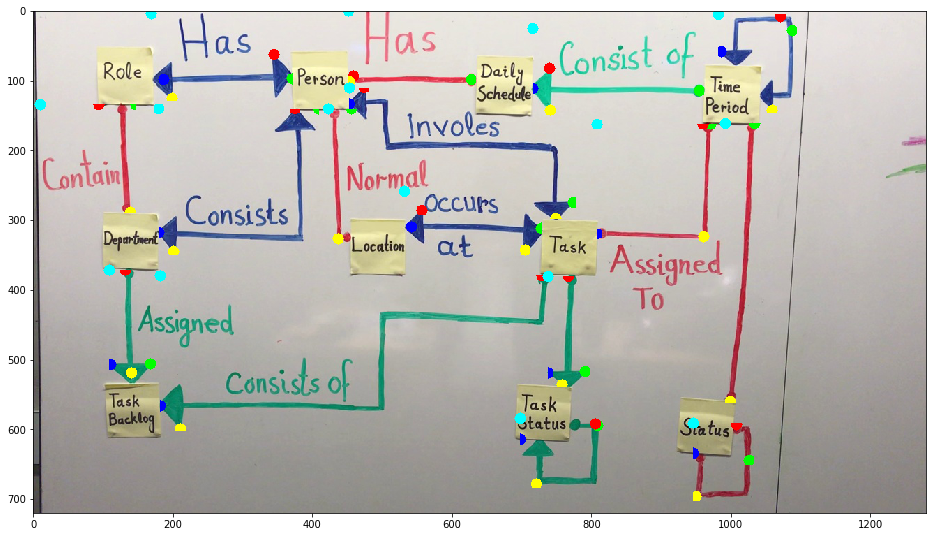

In [6]:
#Visualising the starting point of arrow's bounding boxes
test_image = raw_image_np.copy()
for each_arrow_type in arrow_locations_dict.keys():
        for each in arrow_locations_dict[each_arrow_type]:
            cv2.circle(test_image, (each[0],each[1]), 8, (0, 255, 255), -1)
show_image(test_image)